In [77]:
import time
import pickle
import numpy as np
import pandas as pd

In [80]:
text_file = r"E:\Python_Workplace\OptimalDistinct\Cluster\code\sbert_similarity_results_allcat_with_language.csv"
df = pd.read_csv(text_file)
print(df.columns)
# df_2 = df.iloc[:, :17]
# df_2.columns.values[9] = 'Conversion_start'
# df_2.to_csv(text_file, index=False)
# print(df_2.columns)
for each in df["Description_cleaned"]:
    if ("GPT" in each) or ("gpt" in each):
        print(each)

Index(['GPTs_ID', 'GPTs_Name', 'Description', 'Rating', 'Number of Ratings',
       'Conversions', 'Author URL', 'Author', 'Features', 'Conversion_start',
       'num_rate', 'Website', 'Linkedin', 'Github', 'Twitter', 'num_of_links',
       'map_Category', 'Primary_Language', 'Description_cleaned',
       'Features_cleaned', 'Conversion_start_cleaned'],
      dtype='object')


<Axes: >

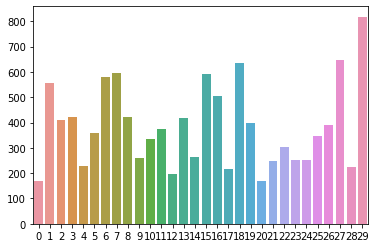

In [42]:
category_counts = df["Description_Cluster"].value_counts()
import seaborn as sns
sns.barplot(x=category_counts.index, y=category_counts.values)

In [43]:
language_summary = df['Primary_Language'].value_counts()
print(language_summary)

en    11578
Name: Primary_Language, dtype: int64


<Axes: >

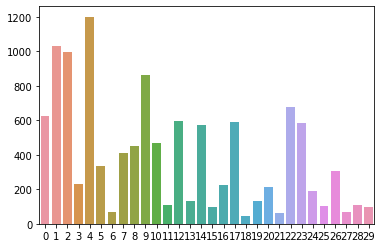

In [44]:
category_counts = df["Features_Cluster"].value_counts()
import seaborn as sns
sns.barplot(x=category_counts.index, y=category_counts.values)

<Axes: >

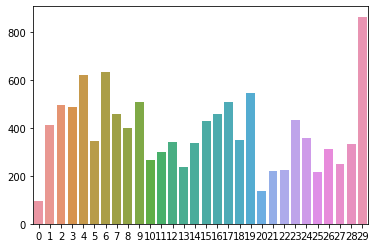

In [45]:
category_counts = df["Conversion_Cluster"].value_counts()
import seaborn as sns
sns.barplot(x=category_counts.index, y=category_counts.values)

In [ ]:
import re

def remove_words_case_insensitive(text, words_to_remove):
    # Convert text to lowercase
    text_lower = text.lower()
    
    # Create a regex pattern to match all words in the list, also convert the list to lowercase
    pattern = '|'.join([re.escape(word.lower()) for word in words_to_remove])
    
    # Use regex sub to replace the words with an empty string
    cleaned_text = re.sub(pattern, '', text_lower)
    
    # Remove extra spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    
    return cleaned_text

# Example usage
words_to_remove = ["Conversion Starters", "AI", "Python", "GPT", "Prompt"]
# text = "Conversion Starters are using AI to create Python scripts for GPT models with specific Prompts. Also, conversion starters are powerful."
text_list = df["Description"].tolist()
cleaned_text = [remove_words_case_insensitive(text, words_to_remove) for text in text_list]

print(cleaned_text)


In [81]:
text_file = r"E:\Python_Workplace\OptimalDistinct\Cluster\code\sbert_similarity_results_allcat_with_cluster.csv"
df = pd.read_csv(text_file)
print(df.columns)

Index(['GPTs_ID', 'GPTs_Name', 'Description', 'Rating', 'Number of Ratings',
       'Conversions', 'Author URL', 'Author', 'Features', 'Conversion_start',
       'num_rate', 'Website', 'Linkedin', 'Github', 'Twitter', 'num_of_links',
       'map_Category', 'Primary_Language', 'Description_cleaned',
       'Features_cleaned', 'Conversion_start_cleaned', 'Description_Cluster',
       'Features_Cluster', 'Conversion_Cluster'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_distances
from sentence_transformers import SentenceTransformer

# Load the model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Sample DataFrame
# df = pd.DataFrame({'ID': ..., 'text': ..., 'cluster_index': ..., 'performance': ...})

# Function to calculate distances and find top 10% performers
def analyze_performance(df):
    # Store results
    results = []

    # Iterate over each cluster
    for cluster in df['cluster_index'].unique():
        cluster_df = df[df['cluster_index'] == cluster]

        # Calculate 90th percentile for performance
        threshold = np.percentile(cluster_df['performance'], 90)
        
        # IDs with performance in the top 10%
        top_ids = cluster_df[cluster_df['performance'] > threshold]['ID']

        # Embed all texts in the cluster
        cluster_texts = cluster_df['text'].tolist()
        embeddings = model.encode(cluster_texts, convert_to_tensor=True)
        
        for idx, row in cluster_df.iterrows():
            focal_id = row['ID']
            focal_text = row['text']
            focal_embedding = model.encode([focal_text], convert_to_tensor=True)
            
            # Calculate distances to top performers
            if focal_id in top_ids:
                distances = cosine_distances(focal_embedding, embeddings[top_ids.index])
                avg_distance = np.mean(distances)
            else:
                avg_distance = None
            
            results.append({
                'ID': focal_id,
                'average_distance_to_top': avg_distance
            })
    
    return pd.DataFrame(results)

# Use the function
# result_df = analyze_performance(df)
